## Task 9


Part b)

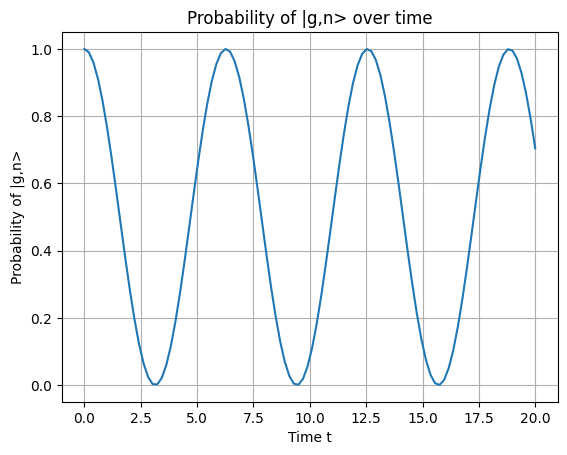

In [ ]:
import numpy as np
from scipy.linalg import expm

delta = 0
g = 1
n = 1


def Hamiltonian_neighbouring(delta,g,n):
    H_rotating = delta * np.array([[0,0],[0,1]]) + g/2*np.sqrt(n) * np.array([[0,1],[1,0]]) 
    return H_rotating


def evolution_op(delta,g,n,t):
    H_rotating = Hamiltonian_neighbouring(delta,g,n)
    Unitary = expm(-1j * H_rotating * t)
    return Unitary
# Hamiltonian is time-independent so we can do this

def evolve_state(delta, g, n, t):
    ground_state = np.array([1,0])
    Unitary = evolution_op(delta,g,n,t)
    evolved_state = Unitary @ ground_state
    return evolved_state

def p_g(t,n):
    return np.abs(evolve_state(delta,g,n,t)[0])**2

times = np.linspace(0, 20, 100)
p_g_values = [p_g(t, n) for t in times]

import matplotlib.pyplot as plt
plt.plot(times, p_g_values)
plt.xlabel('Time t')
plt.ylabel('Probability of |g,n>')
plt.title('Probability of |g,n> over time')
plt.grid()
plt.show()









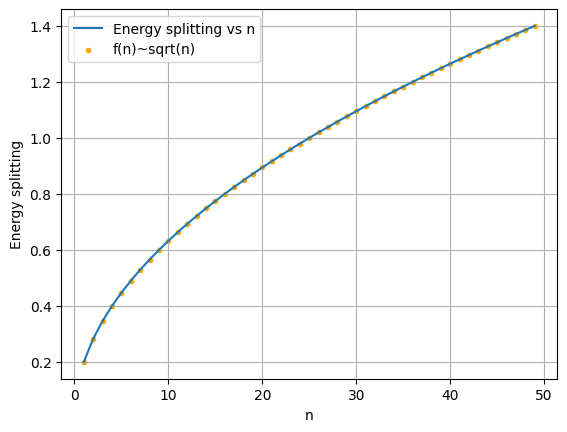

In [38]:


def Eigenvalue_diff(delta,g,n):
    H_rotating = Hamiltonian_neighbouring(delta,g,n)
    eigenvalues, eigenvectors = np.linalg.eig(H_rotating)
    return eigenvalues[0]-eigenvalues[1]


n_values = np.arange(1, 50)
Energy_diffs = [Eigenvalue_diff(delta,g,n) for n in n_values]

plt.plot(n_values, Energy_diffs, label='Energy splitting vs n')
plt.scatter(n_values, 0.2*np.sqrt(n_values),marker=".", label='f(n)~sqrt(n)', color="orange")
plt.xlabel('n')
plt.legend()
plt.ylabel('Energy splitting')
plt.grid()


The proportionality of $\sqrt{n}$ of the Energy splitting can clearly be observed.

Part d)

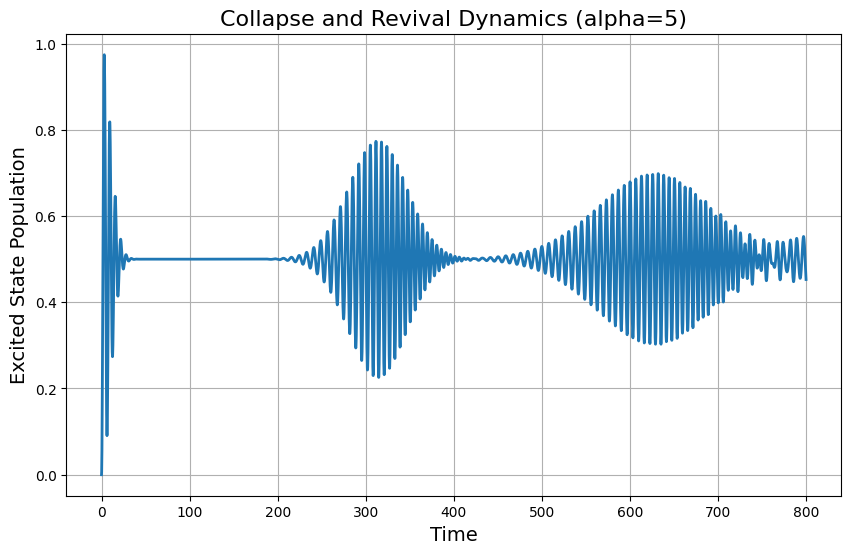

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

  
g = 0.2         
alpha = 5.0     
N = 500         

t_max = 800     
num_points = 5000
times = np.linspace(0, t_max, num_points)

def Hamiltonian(N, qubit_dim):
    a = tensor(destroy(N), qeye(qubit_dim))     # Field annihilation operator
    sm = tensor(qeye(N), destroy(qubit_dim))    # sigma- of the atom

    H = 0.5 * g * (a.dag() * sm + a * sm.dag())
    return H

psi0 = tensor(coherent(N, alpha), basis(2, 0))  # ground state is basis(2,0)

result = mesolve(Hamiltonian(N,2), psi0, times)

exc_population = expect(tensor(qeye(N), basis(2,1).proj()), result.states) # this is the born rule implemented 

# Plot
plt.figure(figsize=(10, 6))
plt.plot(times, exc_population, linewidth=2)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Excited State Population', fontsize=14)
plt.title("Collapse and Revival Dynamics (alpha=5)", fontsize=16)
plt.grid(True)
plt.show()

Revival can be observed as expected at $T_{1} = \frac{4\pi\alpha}{g}$ for $\alpha$ real.